

# Project: Tmdb-Movies Data Analysis
 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Overview
In this report I'm going to investigate Tmdb movies collection which consists of more than 10k movies with some important details such as, revenue, budget, name,...etc.

### Question to be asked
    1. Movies with the most and least profit?
    2. Movies with the most and the least runtime?
    3. Movies with greatest and lowest budget?
    4. Movies with greatest and lowest revenue?
    5. Average runtime?
    6. Average bugdet?
    7. Average revenue?
    8. Average profit?
    9. Most successful genre?
    10. Most successful cast? 
    11. Most successful director?
    12. Most successful year?
    13. Successful Movies Average runtime?
    14.Successful Movies Average budget?
    15.Successful Movies Average revenue?
    16.Successful Movies Average profit?
Note: successful is based on profit.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### I assumed that the used currency is the US Dollar.
#### The runtime is in minutes.

## After understaing the data I will have to make some cleaning
##### 1. Remove unused columns.
##### 2. Find the columns with null values.
##### 3. Delete rows with nulls.
##### 4. Delete duplicates.
##### 5. Change some dataTypes.


### Data Cleaning (Remove useless data)

## 1. Useless columns
#### I decided to delete the following columns:
###### homepage, imdb_id, tagline, id, popularity, budget_adj, revenue_adj, keywords, production_companies, overview, vote_count, vote_average

In [6]:
#Here I'm going to delete columns that I think are useless.
df.drop(['homepage', 'imdb_id', 'tagline', 'id','popularity','budget_adj', 'revenue_adj','keywords','production_companies','overview', 'vote_count', 'vote_average','release_date'],axis = 1, inplace =True)


In [7]:
#view the data after deleting useless columns
df

,budget,revenue,original_title,cast,director,runtime,genres,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,2015
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,2015


In [8]:
df.describe()

,budget,revenue,runtime,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: int64(4), object(4)
memory usage: 679.2+ KB


## 2. Budget and Revenue are having some 0 values, so we going to change them to Nan and delete them

In [10]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].replace(0, np.NaN)


## 3. Removing nulls

### Cast, director and genres are missing some values, so I'm just going to delete rows with nulls

In [11]:
df.dropna(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 8 columns):
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_year      3850 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 270.7+ KB


## 4. Delete duplicates rows

In [13]:
#check how many duplicates rows we have
sum(df.duplicated())

1

#### we have one duplicated row, just delete the row 

In [14]:
df.drop_duplicates(keep ='first', inplace=True)

### 5. Change dataTypes

In [15]:
#view the datatypes in our data
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_year        int64
dtype: object

#### We need to make 2 changes:
   ###### 1. change the budget type to int64.
   ###### 2. change the revenue type to int64.



   

In [16]:
# change budget and revenue.
rows = ['budget', 'revenue']
df[rows] = df[rows].astype(int)

In [17]:
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015


In [18]:
#check the types after the changes
df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
runtime            int64
genres            object
release_year       int64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 8 columns):
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_year      3849 non-null int64
dtypes: int64(4), object(4)
memory usage: 270.6+ KB


In [20]:
df.shape

(3849, 8)

##### After the cleaning we have 3849 rows and 8 columns, before we had 10866 rows and 21 columns

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1. Movies with the most and the least profit?

In [21]:
#Find the profit of each movie
df.insert(2, 'profit', df['revenue'] - df['budget'])



In [22]:
#find the highest and the lowest profit
high  = df['profit'].idxmax()
low  = df['profit'].idxmin()

high = pd.DataFrame(df.loc[high])
low = pd.DataFrame(df.loc[low])

result = pd.concat([high, low], axis = 1)
result

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_year,2009,2010


The first column is for the highest and the second column is for the lowest.

The movie with highest profit is: **_Avatar_**, with profit of: **2,544,505,847 US Dollars**.

The movie with lowest profit is: **_The Warrior's Way_**, with profit of: **-413,912,431 US Dollars**.

### Q2. Movies with the most and least runtime?

In [23]:
#find the highest and the lowset runtime
high  = df['runtime'].idxmax()
low  = df['runtime'].idxmin()

high = pd.DataFrame(df.loc[high])
low = pd.DataFrame(df.loc[low])

result = pd.concat([high, low], axis = 1)
result

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_year,2010,2003


Same as previous for the first and the second columns

The movie with the highest runtime is: **_Carlos_**, with total minutes of: **338 minutes**.

The movie with the lowest runtime is: **_Kid's Story_**, with total minutes of: **15 minutes**.

### Q3. The greatest and the smallest budgets

In [24]:
#find the highest and the lowset budget
high  = df['budget'].idxmax()
low  = df['budget'].idxmin()

high = pd.DataFrame(df.loc[high])
low = pd.DataFrame(df.loc[low])

result = pd.concat([high, low], axis = 1)
result

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_year,2010,1999


Same rule for the two columns applies here also.

The movie with the greatest budget is: **_The Warrior's Way_**, with budget of: **425,000,000 US Dollars**.

The movie with the smallest budget is: **_Lost & Found_**, with budget of: **1 US Dollar**.

### Q4. The greatest and the smallest revenues.

In [25]:
#find the highest and the lowset revenue
high  = df['revenue'].idxmax()
low  = df['revenue'].idxmin()

high = pd.DataFrame(df.loc[high])
low = pd.DataFrame(df.loc[low])

result = pd.concat([high, low], axis = 1)
result

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_year,2009,2003


Same rule for the two columns applies here also.

The movie with the greatest revenue is: **_Avatar_**, with revenue of: **2,781,505,847 US Dollars**.

The movie with the smallest revenue is: **_Shattered Glass_**, with revenue of: **2 US Dollars**.

### Q5. Average runtime

In [26]:
#Find the mean runtime of all movvies
df.runtime.mean()


109.21745908028059

The average runtime of all movies is **109.217** minutes approx.

We can have a visualization of the runtime distribution.

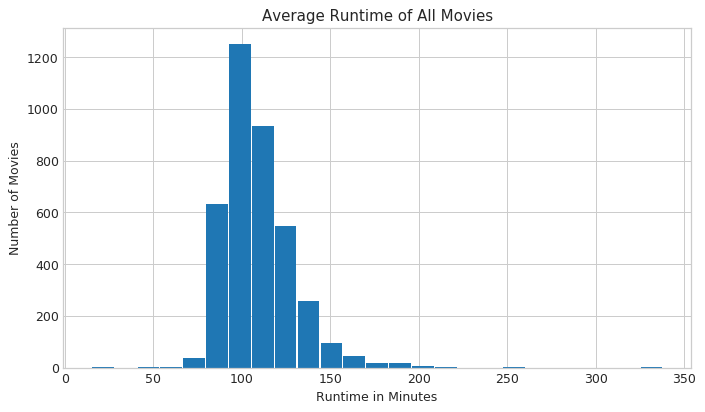

In [46]:
# Plot the runtime.
sns.set_style('whitegrid')
plt.figure(figsize=(9,5), dpi = 90)
plt.ylabel('Number of Movies')
plt.xlabel('Runtime in Minutes')
plt.title('Average Runtime of All Movies')
plt.hist(df['runtime'], rwidth = 0.95, bins=25);

We can conclude form the plot more than 1200 movies have runtime between 80-115 minutes, also we have some outliers, and the graph is right skewed

### Q6. Average Budget

In [47]:
#Find the mean budget of all movies
df.budget.mean()


37248859.980254613

The average budget of all movies is **37,248,859 US Dollars** approximately.



### Q7. Average Revanue

In [48]:
#Find the mean revenue of all movvies
df.revenue.mean()


107814811.610808

The average revenue of all movies is **107,814,811 US Dollars** approx.



### Q8. Average Profit

In [30]:
#Find the mean profit of all movvies
df.profit.mean()


70565951.630553395

The average profit of all movies is **70,565,951 US Dollars** approx.


### Q9. Most Successful Genre

To get the most successful genre, we first have to define what successful is.
Successful is to get more than or equal **40 Million US Dollars**

In [79]:
#lets clean our data again to get the successful movies only.
successful_data = df[df['profit'] >= 40000000]
successful_data.shape

(1493, 9)

We have **1493** successful movies according to our criteria

In [80]:
#Get each genre and count the number of occurrences
genre = successful_data['genres'].str.cat(sep = '|')
genre = pd.Series(genre.split('|'))

genre = genre.value_counts(ascending = False)
#view the top 5 genres
genre.head()

Drama        554
Comedy       542
Action       505
Thriller     454
Adventure    402
dtype: int64

We have found that the most successful genre is: **Drama**

Lets have more details about successful movies and genres.

##### Graphical Details about successful Genres

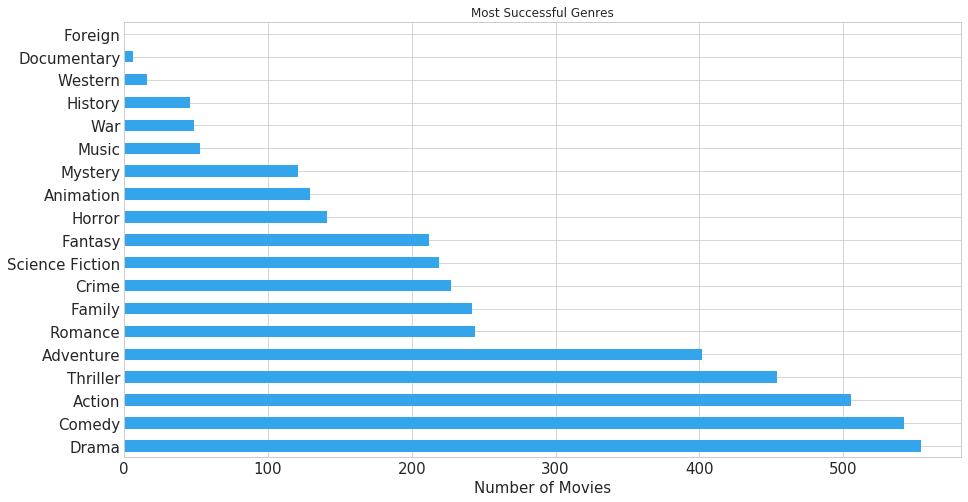

In [81]:
#first sort the data in ascending order
genre.sort_values(inplace = True, ascending = False)
#I choose barh so the reading is easier
genres = genre.plot.barh(color = '#34a4eb', fontsize = 15)
#ser the title
genres.set(title = 'Most Successful Genres')
#set the x-axis
genres.set_xlabel('Number of Movies', fontsize = '15')
#set size
genres.figure.set_size_inches(15, 8)
#plot
plt.show()

### Q10. Most successful Cast

In [82]:
#Get each cast and count the number of occurrences
cast = successful_data['cast'].str.cat(sep = '|')
cast = pd.Series(cast.split('|'))
cast = cast.value_counts(ascending = False)
#view the top 5 Casts
cast.head()

Tom Cruise      27
Tom Hanks       26
Brad Pitt       25
Cameron Diaz    22
Bruce Willis    21
dtype: int64

The most successful cast is **_Tom Cruise_** with **27 apprenaces in the successful list**

### Q11. Most Successful Director

In [67]:
director = successful_data['director'].value_counts(ascending = False)
#view the top 5 Directors
director.head()

Steven Spielberg    24
Clint Eastwood      15
Robert Zemeckis     13
Ridley Scott        12
Tim Burton          11
Name: director, dtype: int64

The most successful director is **_Steven Spielberg_** with **24 apprenaces** in the successful list

### Q12. Most Successful Year

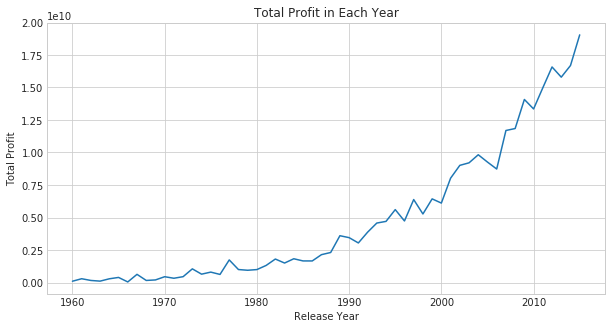

In [71]:
profit_per_year = df.groupby('release_year')['profit'].sum()
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
#set x-axis
plt.xlabel('Release Year')
#set y-axis
plt.ylabel('Total Profit')
#set title
plt.title('Total Profit in Each Year')
#select data
plt.plot(profit_per_year)
#plot
plt.show()

First, as the y-axis is showing that each value is multiplied by 1e10, for example, if we take 1.00 it mean that 10,000,000,000 which equals to 10 Billion US Dollars.

Let's start talking about the graph, as we can see that, as we move in years the total profit is increaing, we can consider the increaing as exponential growth.
Also we can see that the year **2015** is the most profitable year.

### Q13. Successful Movies Average runtime?

In [37]:
successful_data.runtime.mean()

113.19624916275954

The average runtime of successful movies is **113 minutes**.

### Q14. Successful Movies Average Budget?

In [38]:
successful_data.budget.mean()

57308877.083054252

The average budget of successful movies is **57,308,877 US Dollars**.

### Q15. Successful Movies Average Revenue?

In [39]:
successful_data.revenue.mean()

236306323.37374413

The average revenue of successful movies is **236,306,323 US Dollars**.



### Q16. Successful Movies Average Profit?

In [40]:
successful_data.profit.mean()

178997446.29068989

The average profit of successful movies is **178,997,446 US Dollars**.

<a id='conclusions'></a>
## Conclusions
To conclude, after a huge analysis we came up with very amazing facts about movies.

**To have a successful movie or profitable movie we can do the following:**

     - You should try to include some of the following successful casts: Tom Cruise - Tom Hanks - Brad Pitt - Cameron Diaz - Sylvester Stallone.
     - You also may choose one of the following directors: Steven Spielberg - Clint Eastwood - Robert Zemeckis - Ridley Scott - Tim Burton.
     - Your  runtime should be around 113 minutes.
     - Your budget should be close to 57 Billion US Dollars.
   

After following these instructions you should be able to make a **revenue of 236 Billion US Dollars** and with total **profit equal to 179 Billion Dollars**.

**Limitations:** First, to make sure that this analyis is not 100 precent sure, the analysis may include errors, that means, if you follow these steps you will have a high probabilty of making a profit and having a successful movie. Also the data provided may not be up-to-date, many factors or facts may have changed. The deleted rows or data may had a significant impact, but we had to get rid of them, this might have affected the analysis.
    


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0